In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
import matplotlib.pyplot as plt

from pprint import pprint

import re

from scripts.dataset_explorer import SODataSetExplorer

In [3]:
import cufflinks as cf
import plotly.offline

cf.go_offline();
cf.set_config_file(offline=False, world_readable=True);

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', None)

In [5]:
df_explorer = SODataSetExplorer()

### Exploring Education

In [6]:
df_explorer.similar_columns(['ed_', 'education']);

2011
{'recommendation_likely_acted_upon', 'techn_related_purchases_last_year'}


2012
{'add_rate_ive_taken_a_trial/purchased_a_product_from_ads',
 'techn_related_purchases_last_year'}


2013
{'add_rate_ive_taken_a_trial/purchased_a_product_from_ads',
 'changed_job_last_year',
 'importance_limited_night_weekend_work',
 'preferred_mobile_support',
 'preferred_software_business_model',
 'techn_related_purchases_last_year'}


2014
{'add_rate_ive_taken_a_trial/purchased_a_product_from_ads',
 'changed_job_last_year',
 'contacted_about_job_opportunities_email',
 'contacted_about_job_opportunities_linkedin_inmail',
 'contacted_about_job_opportunities_phone',
 'contacted_about_job_opportunities_stackedoverflow_careers_message',
 'contacted_about_job_opportunities_twitter',
 'contacted_by_recruiters_frecuency',
 'job_opportunity_email_details_importance_for_response_message_is_personalized_to_me',
 'preferred_mobile_support'}


2015
{'changed_jobs_in_last_12_months',
 'education',
 'education_ot

In [7]:
education_columns = {
    2015: ['education', 'education_other'],
    2016: ['education'],
    2017: ['education_types', 'education_important'],
    2018: ['education_types'],
    2019: ['ed_level'],
    2020: ['ed_level', 'new_ed_impt'],
}

* `education` 2015-2016. multiple choice categorical features.
* `education_types`. 2017-2018. multiple choice categorical features.

In [8]:
df_explorer.display_feature_across_years('ed_level', display, year_summary=False, feature_per_year=True)

,year,ed_level
0,2019,Associate degree
1,2019,"Bachelor’s degree (BA, BS, B.Eng., etc.)"
2,2019,I never completed any formal education
3,2019,"Master’s degree (MA, MS, M.Eng., MBA, etc.)"
4,2019,"Other doctoral degree (Ph.D, Ed.D., etc.)"
5,2019,Primary/elementary school
6,2019,"Professional degree (JD, MD, etc.)"
7,2019,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)"
8,2019,Some college/university study without earning a degree
9,2020,"Associate degree (A.A., A.S., etc.)"


* `ed_level`. 2019-2020. categorical.

### Exploring Mayor

In [9]:
df_explorer.similar_columns(['major']);

2017
{'major_undergrad'}


2018
{'undergrad_major'}


2019
{'undergrad_major'}


2020
{'undergrad_major'}




In [10]:
major_rename = {
    'major_undergrad': 'undergrad_major'
}

In [11]:
df_explorer.rename_columns(major_rename)

In [12]:
df_explorer.display_feature_across_years('undergrad_major', display, year_summary=False, feature_per_year=True)

,year,undergrad_major
0,2017,A business discipline
1,2017,A health science
2,2017,A humanities discipline
3,2017,A natural science
4,2017,A non-computer-focused engineering discipline
5,2017,A social science
6,2017,Computer engineering or electrical/electronics engineering
7,2017,Computer programming or Web development
8,2017,Computer science or software engineering
9,2017,Fine arts or performing arts


* `undergrad_major`. 2017 onwards. categorical.

### Exploring Job Factors

In [13]:
df_explorer.similar_columns(['factor']);

2013
{'time_per_week_refactoring_code_quality'}


2014
{'time_per_week_refactoring_code_quality'}


2019
{'job_factors'}


2020
{'job_factors'}




In [14]:
df_explorer.display_feature_across_years('job_factors', display, year_summary=False, feature_per_year=True)

,year,job_factors
0,2019,Diversity of the company or organization
1,2019,Diversity of the company or organization;Flex time or a flexible schedule
2,2019,Diversity of the company or organization;How widely used or impactful my work output would be
3,2019,Diversity of the company or organization;How widely used or impactful my work output would be;Flex time or a flexible schedule
4,2019,Financial performance or funding status of the company or organization
5,2019,Financial performance or funding status of the company or organization;Diversity of the company or organization
6,2019,Financial performance or funding status of the company or organization;Diversity of the company or organization;Flex time or a flexible schedule
7,2019,Financial performance or funding status of the company or organization;Diversity of the company or organization;How widely used or impactful my work output would be
8,2019,Financial performance or funding status of the company or organization;Flex time or a flexible schedule
9,2019,Financial performance or funding status of the company or organization;How widely used or impactful my work output would be


* `job_factors`. 2019-2020. multiple choice categorical feature.

### Exploring Employment

In [15]:
df_explorer.similar_columns(['employ']);

2015
{'employment_status'}


2016
{'employment_status'}


2017
{'employment_status'}


2018
{'employment'}


2019
{'employment'}


2020
{'employment'}




In [16]:
employment_rename = {'employment_status': 'employment'}

In [17]:
df_explorer.rename_columns(employment_rename)

In [18]:
df_explorer.display_feature_across_years('employment', display, year_summary=False, feature_per_year=True)

,year,employment
0,2015,Employed full-time
1,2015,Employed part-time
2,2015,Freelance / Contractor
3,2015,I'm a student
4,2015,Other
5,2015,Prefer not to disclose
6,2015,Retired
7,2015,Unemployed
8,2016,Employed full-time
9,2016,Employed part-time


* `employment`. 2015 onwards. categorical

### Exploring Organization Size

In [19]:
df_explorer.similar_columns(['size']);

2011
{'company_size'}


2012
{'company_size'}


2013
{'company_developer_size', 'team_size', 'company_size'}


2014
{'company_developer_size'}


2016
{'company_size_range', 'team_size_range'}


2017
{'company_size'}


2018
{'company_size'}


2019
{'org_size'}


2020
{'org_size'}




In [20]:
org_size_rename = {'company_size': 'org_size'}
df_explorer.rename_columns(org_size_rename)

In [21]:
df_explorer.display_feature_across_years('org_size', display, year_summary=False, feature_per_year=True)

,year,org_size
0,2011,"Fortune 1000 (1,000+)"
1,2011,Mature Small Business (25-100)
2,2011,Mid Sized (100-999)
3,2011,"Other (not working, consultant, etc.)"
4,2011,Start Up (1-25)
5,2011,Student
6,2012,"Fortune 1000 (1,000+)"
7,2012,Mature Small Business (25-100)
8,2012,Mid Sized (100-999)
9,2012,"Other (not working, consultant, etc.)"


* `org_size`. 2017 onwards categorical range.

### Exploring remote status

In [22]:
df_explorer.similar_columns(['remote', 'work', 'loc']);

2012
{'add_rate_what_ads_i_use_an_ad_blocker'}


2013
{'add_rate_what_ads_i_use_an_ad_blocker',
 'importance_40_hour_work_week',
 'importance_high_caliber_team_is_everyone_else_smart_hardworking',
 'importance_limited_night_weekend_work',
 'importance_lots_of_control_over_your_own_work',
 'importance_quality_of_workstation_dream_machine_30inch_monitors_etc'}


2014
{'add_rate_what_ads_i_use_an_ad_blocker',
 'enjoy_working_remotely',
 'job_opportunity_email_details_importance_for_response_describes_benefits_perks_of_the_work_environment',
 'job_opportunity_email_details_importance_for_response_describes_the_team_i_will_work_on',
 'remote_location',
 'remote_status'}


2015
{'how_important_is_remote_when_evaluating_new_job_opportunity',
 'remote_status',
 'want_work_language',
 'want_work_language_other'}


2016
{'remote', 'agree_adblocker'}


2017
{'assess_job_remote',
 'collaborate_remote',
 'have_worked_database',
 'have_worked_framework',
 'have_worked_language',
 'have_worked_platfo

* `remote_status`, `remote`, `home_remote`, `assess_job_remote`, `collaborate_remote`, `work_remote`. 2014-2017,2019
* `remote_location`, `work_loc`. 2014, 2019

In [23]:
remote_rename = {
    'remote_status': 'remote', 
    'home_remote': 'remote', 
    'work_remote': 'remote', 
}
df_explorer.rename_columns(remote_rename)

In [24]:
df_explorer.display_feature_across_years('remote', display) #, year_summary=False, feature_per_year=True)

count  \
year remote                                                           
2014 Full-time Remote                                           762   
     Never                                                     2606   
     Occasionally                                              3132   
     Part-time Remote                                           719   
2015 Full-time Remote                                          1687   
     I rarely work remote                                      7768   
     Never                                                     3687   
     Part-time Remote                                          3010   
2016 Full-time remote                                          4872   
     I rarely work remotely                                   19212   
     Never                                                     8946   
     Part-time remote                                          7088   
2017 A few days each month                                    15454   
     About half the time                                       1769   
     All or almost all the time (I'm full-time remote)         4905   
     It's complicated                                          1849   
     Less than half the time, but at least one day each week   4147   
     More than half, but not all, the time                     1909   
     Never                                                    13975   
2019 A few days each month                                    17242   
     About half the time                                       1986   
     All or almost all the time (I'm full-time remote)         8465   
     It's complicated                                          3675   
     Less than half the time, but at least one day each week   6320   
     Less than once per month / Never                         30220   
     More than half, but not all, the time                     2376   

                                                              percentage  
year remote                                                               
2014 Full-time Remote                                             0.1056  
     Never                                                        0.3610  
     Occasionally                                                 0.4339  
     Part-time Remote                                             0.0996  
2015 Full-time Remote                                             0.1044  
     I rarely work remote                                         0.4809  
     Never                                                        0.2283  
     Part-time Remote                                             0.1864  
2016 Full-time remote                                             0.1214  
     I rarely work remotely                                       0.4789  
     Never                                                        0.2230  
     Part-time remote                                             0.1767  
2017 A few days each month                                        0.3512  
     About half the time                                          0.0402  
     All or almost all the time (I'm full-time remote)            0.1115  
     It's complicated                                             0.0420  
     Less than half the time, but at least one day each week      0.0942  
     More than half, but not all, the time                        0.0434  
     Never                                                        0.3176  
2019 A few days each month                                        0.2453  
     About half the time                                          0.0283  
     All or almost all the time (I'm full-time remote)            0.1204  
     It's complicated                                             0.0523  
     Less than half the time, but at least one day each week      0.0899  
     Less than once per month / Never                             0.4300  
     More than half, but not all, the time      

* `remote`. 2014-2017, 2019. categorical. indicate frequency of remote working.

### Exploring job satisfaction

In [25]:
df_explorer.similar_columns(['job_sat',]);

2011
{'job_satisfaction'}


2012
{'job_satisfaction'}


2013
{'job_satisfaction'}


2015
{'job_satisfaction'}


2016
{'job_satisfaction'}


2017
{'job_satisfaction'}


2018
{'job_satisfaction'}


2019
{'job_sat'}


2020
{'job_sat'}




In [26]:
job_satisfaction_rename = {
    'job_sat': 'job_satisfaction', 
}
df_explorer.rename_columns(job_satisfaction_rename)

In [27]:
df_explorer.display_feature_across_years('job_satisfaction', display) #, year_summary=False, feature_per_year=True)

count  percentage
year job_satisfaction                                                     
2011 FML                                                    63      0.0247
     I enjoy going to work                                1419      0.5558
     I'm not happy in my job                               159      0.0623
     It pays the bills                                     585      0.2291
     So happy it hurts                                     327      0.1281
2012 Hate my job                                            63      0.0116
     I enjoy going to work                                2363      0.4341
     I wish I had a job!                                   395      0.0726
     I'm not happy in my job                               344      0.0632
     Its a paycheck                                        891      0.1637
     Love my job                                          1388      0.2550
2013 Hate my job                                            80      0.0105
     I enjoy going to work                                3383      0.4435
     I wish I had a job!                                   502      0.0658
     I'm not happy in my job                               527      0.0691
     It's a paycheck                                      1163      0.1525
     Love my job                                          1973      0.2587
2015 I hate my job                                         305      0.0189
     I love my job                                        5819      0.3598
     I'm neither satisfied nor dissatisfied with my job   1775      0.1097
     I'm somewhat dissatisfied with my job                1565      0.0968
     I'm somewhat satisfied with my job                   6540      0.4044
     Other (please specify)                                170      0.0105
2016 I don't have a job                                    268      0.0067
     I hate my job                                         833      0.0208
     I love my job                                       13251      0.3304
     I'm neither satisfied nor dissatisfied               4416      0.1101
     I'm somewhat dissatisfied with my job                4512      0.1125
     I'm somewhat satisfied with my job                  16413      0.4092
     Other (please specify)                                417      0.0104
2017 0                                                     467      0.0116
     1                                                     373      0.0092
     10                                                   4148      0.1027
     2                                                     888      0.0220
     3                                                    1635      0.0405
     4                                                    1865      0.0462
     5                                                    3749      0.0929
     6                                                    4726      0.1170
     7                                                    7969      0.1974
     8                                                    8983      0.2225
     9                                                    5573      0.1380
2018 Extremely dissatisfied                               2482      0.0358
     Extremely satisfied                                 12436      0.1795
     Moderately dissatisfied                              6318      0.0912
     Moderately satisfied                                26005      0.3754
     Neither satisfied nor dissatisfied                   4966      0.0717
     Slightly dissatisfied                                7057      0.1019
     Slightly satisfied                                  10012      0.1445
2019 Neither satisfied nor dissatisfied                   8720      0.1228
     Slightly dissatisfied                               10752      0.1515
     Slightly satisfied                                  24207      0.3410
     Very dissatisfied                                    4857      0.0684
     Ve

* `job_satisfaction`. 2011-2020 but 2014. categorical.

### Exploring Ethnicity

In [28]:
df_explorer.similar_columns(['ethnicity']);

2018
{'race_ethnicity'}


2019
{'ethnicity'}


2020
{'ethnicity'}




In [29]:
ethnicity_rename = {'race_ethnicity': 'ethnicity'}
df_explorer.rename_columns(ethnicity_rename)

In [30]:
df_explorer.display_feature_across_years('ethnicity', display,)# year_summary=False, feature_per_year=True)

count  \
year ethnicity                                                                                                                                                                                                                                            
2018 Black or of African descent                                                                                                                                                                                                                   1224   
     Black or of African descent;East Asian                                                                                                                                                                                                           7   
     Black or of African descent;East Asian;Hispanic or Latino/Latina                                                                                                                                                                                 2   
     Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian                                                                                                      1   
     Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian                                                                                          1   
     Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent                                                            48   
     Black or of African descent;East Asian;Hispanic or Latino/Latina;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;White or of European descent                                                                         1   
     Black or of African descent;East Asian;Hispanic or Latino/Latina;White or of European descent                                                                                                                                                    1   
     Black or of African descent;East Asian;Middle Eastern;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent                                                                                       3   
     Black or of African descent;East Asian;Native American, Pacific Islander, or Indigenous Australian                                                                                                                                               1   
     Black or of African descent;East Asian;Native American, Pacific Islander, or Indigenous Australian;South Asian;White or of European descent                                                                                                      1   
     Black or of African descent;East Asian;Native American, Pacific Islander, or Indigenous Australian;White or of European descent                                                                                                                  3   
     Black or of African descent;East Asian;South Asian                                                                                                                                                                                               1   
     Black or of African descent;East Asian;White or of European descent                                                                                                                                                                              8   
     Black or of African descent;Hispanic or Latino/Latina                                                                                                                                                                        

* `ethnicity`. 2018 onwards. multiple choice categorical feature

### Exploring Main Branch

In [31]:
df_explorer.similar_columns(['branch']);

2019
{'main_branch'}


2020
{'main_branch'}




In [32]:
df_explorer.display_feature_across_years('main_branch', display, year_summary=False, feature_per_year=True)

,year,main_branch
0,2019,I am a developer by profession
1,2019,I am a student who is learning to code
2,2019,"I am not primarily a developer, but I write code sometimes as part of my work"
3,2019,I code primarily as a hobby
4,2019,"I used to be a developer by profession, but no longer am"
5,2020,I am a developer by profession
6,2020,I am a student who is learning to code
7,2020,"I am not primarily a developer, but I write code sometimes as part of my work"
8,2020,I code primarily as a hobby
9,2020,"I used to be a developer by profession, but no longer am"


* `main_branch`. 2019-2020. categorical.

### Exploring Hobby

In [33]:
df_explorer.similar_columns(['hobby']);

2015
{'how_many_hours_programming_as_hobby_per_week'}


2016
{'hobby'}


2017
{'program_hobby'}


2018
{'hobby'}


2019
{'hobbyist'}


2020
{'hobbyist'}




In [34]:
hobbyist_rename = {'new_column_name': 'hobbyist', 'year_map': {2018: 'hobby'}}
df_explorer.rename_columns(hobbyist_rename, by_year=True)

In [35]:
df_explorer.display_feature_across_years('hobbyist', display) #, year_summary=False, feature_per_year=True)

count  percentage
year hobbyist                   
2018 No        18958      0.1918
     Yes       79897      0.8082
2019 No        17626      0.1983
     Yes       71257      0.8017
2020 No        14028      0.2178
     Yes       50388      0.7822

* `hobbyist`. From 2018 onwards boolean feature

### Exploring Age

In [36]:
df_explorer.similar_columns(['age']);

2011
{'programming_languages', 'programming_languages_oher', 'age'}


2012
{'programming_language_other', 'programming_language', 'age'}


2013
{'age',
 'importance_positive_organization_structure_not_much_bureaucracy_helpful_management',
 'programming_languages',
 'programming_languages_other'}


2014
{'age',
 'contacted_about_job_opportunities_stackedoverflow_careers_message',
 'job_opportunity_email_details_importance_for_response_link_to_a_stack_overflow_careers_company_page_or_other_source_of_more_information_about_the_company_videos_articles_etc',
 'job_opportunity_email_details_importance_for_response_message_is_personalized_to_me',
 'programming_languages',
 'programming_languages_other'}


2015
{'age',
 'appealing_message_traits',
 'how_many_caffeinated_beverages_per_day',
 'programming_language',
 'programming_language_other',
 'want_work_language',
 'want_work_language_other'}


2016
{'age_range', 'age_midpoint'}


2017
{'equipment_satisfied_storage',
 'have_worked_language'

In [37]:
df_explorer.display_feature_across_years('age', display, year_summary=False, feature_per_year=True)

,year,age
0,2011,20-24
1,2011,25-29
2,2011,30-34
3,2011,35-39
4,2011,40-50
5,2011,51-60
6,2011,< 20
7,2011,>60
8,2012,20-24
9,2012,25-29


* `age`. 2019-2020. continuous feature. Before is defined as a categorical range.

In [38]:
df_explorer.display_feature_across_years('age1st_code', display)#, year_summary=False, feature_per_year=True)

count  percentage
year age1st_code                            
2019 10                     5061      0.0578
     11                     3515      0.0401
     12                     7735      0.0883
     13                     6377      0.0728
     14                     8452      0.0964
     15                     8681      0.0991
     16                     8633      0.0985
     17                     5915      0.0675
     18                     7945      0.0907
     19                     4561      0.0520
     20                     3718      0.0424
     21                     1940      0.0221
     22                     1710      0.0195
     23                     1054      0.0120
     24                      842      0.0096
     25                      914      0.0104
     26                      491      0.0056
     27                      417      0.0048
     28                      346      0.0039
     29                      242      0.0028
     30                      384      0.0044
     31                      130      0.0015
     32                      139      0.0016
     33                      126      0.0014
     34                       92      0.0010
     35                      134      0.0015
     36                       37      0.0004
     37                       41      0.0005
     38                       43      0.0005
     39                       22      0.0003
     40                       63      0.0007
     41                       16      0.0002
     42                       20      0.0002
     43                       18      0.0002
     44                       18      0.0002
     45                       20      0.0002
     46                       10      0.0001
     47                        8      0.0001
     48                        4      0.0000
     49                       10      0.0001
     5                       521      0.0059
     50                       16      0.0002
     51                        3      0.0000
     52                        2      0.0000
     53                        2      0.0000
     54                        4      0.0000
     55                        7      0.0001
     56                        4      0.0000
     57                        1      0.0000
     58                        1      0.0000
     6                       828      0.0094
     60                        5      0.0001
     61                        2      0.0000
     62                        1      0.0000
     63                        1      0.0000
     65                        3      0.0000
     66                        2      0.0000
     67                        1      0.0000
     68                        1      0.0000
     7                      1395      0.0159
     77                        1      0.0000
     79                        2      0.0000
     8                      2471      0.0282
     80                        2      0.0000
     83                        1      0.0000
     84                        1      0.0000
     9                      1926      0.0220
     Older than 85            26      0.0003
     Younger than 5 years    520      0.0059
2020 10                     3424      0.0591
     11                     2358      0.0407
     12                     5081      0.0878
     13                     4187      0.0723
     14                     5514      0.0952
     15                     5618      0.0970
     16                     5463      0.0944
     17                     3973      0.0686
     18                     5382      0.0930
     19                     3120      0.0539
     20                     2453      0.0424
     21                     1221      0.0211
     22                      999      0.0173
     23                      710      0.0123
     24                      577      0.0100
     25                      636      0.0110
     26                      342      0.0059
     27                      264      0.0046
     28               

* `age1st_code`. 2019-2020. continuous feature (with exceptions).

### Exploring Gender

In [39]:
df_explorer.similar_columns(['gender']);

2014
{'gender'}


2015
{'gender'}


2016
{'gender'}


2017
{'gender'}


2018
{'gender'}


2019
{'gender'}


2020
{'gender'}




In [40]:
df_explorer.display_feature_across_years('gender', display) #, year_summary=False, feature_per_year=True)

count  \
year gender                                                                             
2014 Female                                                                       352   
     Male                                                                        6864   
     Prefer not to disclose                                                       130   
2015 Female                                                                      1480   
     Male                                                                       23699   
     Other                                                                        128   
     Prefer not to disclose                                                       437   
2016 Female                                                                      3202   
     Male                                                                       51388   
     Other                                                                        274   
     Prefer not to disclose                                                       722   
2017 Female                                                                      2600   
     Female; Gender non-conforming                                                 29   
     Female; Gender non-conforming; Other                                           1   
     Female; Other                                                                  1   
     Female; Transgender                                                           56   
     Female; Transgender; Gender non-conforming                                     8   
     Female; Transgender; Gender non-conforming; Other                              1   
     Female; Transgender; Other                                                     1   
     Gender non-conforming                                                        160   
     Gender non-conforming; Other                                                   4   
     Male                                                                       31589   
     Male; Female                                                                  15   
     Male; Female; Gender non-conforming                                            1   
     Male; Female; Gender non-conforming; Other                                     1   
     Male; Female; Other                                                            2   
     Male; Female; Transgender                                                      4   
     Male; Female; Transgender; Gender non-conforming                               7   
     Male; Female; Transgender; Gender non-conforming; Other                       15   
     Male; Female; Transgender; Other                                               1   
     Male; Gender non-conforming                                                   65   
     Male; Gender non-conforming; Other                                             3   
     Male; Other                                                                  171   
     Male; Transgender                                                             11   
     Male; Transgender; Gender non-conforming                                       4   
     Male; Transgender; Other                                                       1   
     Other                                                                        225   
     Transgender                                                                   55   
     Transgender; Gender non-conforming                                            15   
     Transgender; Other                                                             1   
2018 Female                                                                      4025   
     Female;Male                                                                   98   
     Female;Male;Non-binary, genderqueer, or gender non-conforming                  3   
     Female;Male;Transgender                                               

* `gender`. From 2014 till 2016: categorical single choice. 2017 onwards: categorical multiple choice

### Exploring sexuality

In [41]:
df_explorer.similar_columns(['sex']);

2018
{'sexual_orientation'}


2019
{'sexuality'}


2020
{'sexuality'}




In [42]:
sexuality_rename = {'sexual_orientation': 'sexuality'}
df_explorer.rename_columns(sexuality_rename)

In [43]:
df_explorer.display_feature_across_years('sexuality', display) #, year_summary=False, feature_per_year=True)

count  \
year sexuality                                                                  
2018 Asexual                                                              717   
     Bisexual or Queer                                                   1950   
     Bisexual or Queer;Asexual                                             51   
     Gay or Lesbian                                                      1181   
     Gay or Lesbian;Asexual                                                28   
     Gay or Lesbian;Bisexual or Queer                                      95   
     Gay or Lesbian;Bisexual or Queer;Asexual                              15   
     Straight or heterosexual                                           55013   
     Straight or heterosexual;Asexual                                     235   
     Straight or heterosexual;Bisexual or Queer                           351   
     Straight or heterosexual;Bisexual or Queer;Asexual                    23   
     Straight or heterosexual;Gay or Lesbian                               27   
     Straight or heterosexual;Gay or Lesbian;Bisexual or Queer             19   
     Straight or heterosexual;Gay or Lesbian;Bisexual or Queer;Asexual     60   
2019 Bisexual                                                            3440   
     Bisexual;Gay or Lesbian                                              114   
     Bisexual;Gay or Lesbian;Straight / Heterosexual                      108   
     Bisexual;Straight / Heterosexual                                     494   
     Gay or Lesbian                                                      1798   
     Gay or Lesbian;Straight / Heterosexual                                38   
     Straight / Heterosexual                                            70155   
2020 Bisexual                                                            1918   
     Bisexual;Gay or Lesbian                                               40   
     Bisexual;Gay or Lesbian;Queer                                         24   
     Bisexual;Gay or Lesbian;Straight / Heterosexual                        8   
     Bisexual;Gay or Lesbian;Straight / Heterosexual;Queer                 39   
     Bisexual;Queer                                                       191   
     Bisexual;Straight / Heterosexual                                     258   
     Bisexual;Straight / Heterosexual;Queer                                10   
     Gay or Lesbian                                                       978   
     Gay or Lesbian;Queer                                                  90   
     Gay or Lesbian;Straight / Heterosexual                                13   
     Queer                                                                249   
     Straight / Heterosexual                                            40118   
     Straight / Heterosexual;Queer                                         56   

                                                                        percentage  
year sexuality                                                                      
2018 Asexual                                                                0.0120  
     Bisexual or Queer                                                      0.0326  
     Bisexual or Queer;Asexual                                              0.0009  
     Gay or Lesbian                                                         0.0198  
     Gay or Lesbian;Asexual                                                 0.0005  
     Gay or Lesbian;Bisexual or Queer                                       0.0016  
     Gay or Lesbian;Bisexual or Queer;Asexual                               0.0003  
     Straight or heterosexual                                               0.9205  
     Straight or heterosexual;Asexual                                       0.0039  
     Straight or heterosexual;Bisexual or Queer                             0.0059  
     Straight or heterosexual;Bisexual or Queer;Asexua

* `sexuality`. since 2018. multiple choice categorical feature.

In [44]:
df_explorer.similar_columns(['trans']);

2019
{'trans'}


2020
{'trans'}




In [45]:
df_explorer.display_feature_across_years('trans', display) #, year_summary=False, feature_per_year=True)

count  percentage
year trans                   
2019 No     82576      0.9877
     Yes     1031      0.0123
2020 No     48871      0.9904
     Yes      474      0.0096

* `trans`. 2019-2020. boolean.

### Exploring Learning related features

In [46]:
df_explorer.similar_columns(['learn']);

2013
{'importance_opportunity_to_use_learn_new_technologies',
 'time_per_week_learning_new_skills'}


2014
{'time_per_week_learning_new_skills'}


2016
{'why_learn_new_tech'}


2017
{'learning_new_tech', 'learned_hiring'}


2020
{'new_learn'}




In [47]:
df_explorer.display_feature_across_years('why_learn_new_tech', display) #, year_summary=False, feature_per_year=True)

count  percentage
year why_learn_new_tech                                               
2016 I learn new technology when my job requires it   2766      0.0599
     I want to be a better developer                 16236      0.3518
     I'm curious                                     13231      0.2867
     Other (please specify)                            770      0.0167
     To build a specific product I have in mind       3647      0.0790
     To keep my skills up to date                     7400      0.1604
     To pursue career goals                           2095      0.0454

* Learning related feature doesnt seem to be consistent across years

### Exploring Code related features

In [48]:
df_explorer.similar_columns(['code']);

2013
{'time_per_week_refactoring_code_quality'}


2014
{'job_opportunity_email_details_importance_for_response_mentions_my_code_or_stack_overflow_activity',
 'time_per_week_refactoring_code_quality'}


2016
{'agree_nightcode'}


2017
{'check_in_code',
 'ex_coder10_years',
 'ex_coder_active',
 'ex_coder_balance',
 'ex_coder_belonged',
 'ex_coder_not_for_me',
 'ex_coder_return',
 'ex_coder_skills',
 'ex_coder_will_not_code',
 'other_peoples_code',
 'stack_overflow_copied_code',
 'years_coded_job',
 'years_coded_job_past'}


2018
{'check_in_code'}


2019
{'age1st_code', 'code_rev', 'years_code', 'years_code_pro', 'code_rev_hrs'}


2020
{'years_code_pro', 'years_code', 'age1st_code'}




In [49]:
df_explorer.display_feature_across_years('years_code', display) #, year_summary=False, feature_per_year=True)

count  percentage
year years_code                           
2019 1                    1814      0.0206
     10                   6777      0.0771
     11                   2265      0.0258
     12                   3530      0.0401
     13                   2036      0.0232
     14                   2126      0.0242
     15                   3942      0.0448
     16                   1593      0.0181
     17                   1349      0.0153
     18                   1900      0.0216
     19                   1018      0.0116
     2                    3974      0.0452
     20                   3636      0.0413
     21                    715      0.0081
     22                   1016      0.0116
     23                    745      0.0085
     24                    693      0.0079
     25                   1657      0.0188
     26                    409      0.0047
     27                    408      0.0046
     28                    465      0.0053
     29                    234      0.0027
     3                    5179      0.0589
     30                   1532      0.0174
     31                    202      0.0023
     32                    420      0.0048
     33                    353      0.0040
     34                    327      0.0037
     35                    873      0.0099
     36                    308      0.0035
     37                    321      0.0037
     38                    340      0.0039
     39                    170      0.0019
     4                    5729      0.0651
     40                    497      0.0057
     41                     92      0.0010
     42                    115      0.0013
     43                     83      0.0009
     44                     52      0.0006
     45                    113      0.0013
     46                     27      0.0003
     47                     36      0.0004
     48                     31      0.0004
     49                     25      0.0003
     5                    7047      0.0801
     50                     51      0.0006
     6                    6179      0.0703
     7                    5320      0.0605
     8                    5361      0.0610
     9                    3360      0.0382
     Less than 1 year     1367      0.0155
     More than 50 years    126      0.0014
2020 1                     902      0.0156
     10                   4510      0.0782
     11                   1691      0.0293
     12                   2453      0.0425
     13                   1468      0.0254
     14                   1479      0.0256
     15                   2586      0.0448
     16                   1203      0.0209
     17                   1057      0.0183
     18                   1089      0.0189
     19                    657      0.0114
     2                    1916      0.0332
     20                   2562      0.0444
     21                    550      0.0095
     22                    792      0.0137
     23                    572      0.0099
     24                    449      0.0078
     25                   1338      0.0232
     26                    378      0.0066
     27                    335      0.0058
     28                    314      0.0054
     29                    178      0.0031
     3                    2951      0.0512
     30                   1114      0.0193
     31                    154      0.0027
     32                    309      0.0054
     33                    236      0.0041
     34                    230      0.0040
     35                    599      0.0104
     36                    246      0.0043
     37                    258      0.0045
     38                    289      0.0050
     39                    155      0.0027
     4                    3254      0.0564
     40                    535      0.0093
     41                     99      0.0017
     42                    127      0.0022
     43                     92      0.0016
     44                     69      0.0012
     45                   

* `years_coded_job`, `years_coded_job_past`. 2017. categorical range.
* `years_code`, `years_code_pro`. 2019-2020. continuous feature (with exceptions).

### Exploring Hours

In [50]:
df_explorer.similar_columns(['hrs', 'hour']);

2013
{'importance_40_hour_work_week'}


2015
{'how_many_hours_programming_as_hobby_per_week'}


2017
{'hours_per_week'}


2018
{'hours_outside', 'hours_computer'}


2019
{'code_rev_hrs', 'work_week_hrs'}


2020
{'work_week_hrs'}




In [51]:
df_explorer.display_feature_across_years('hours_per_week', display) #, year_summary=False, feature_per_year=True)

count  percentage
year hours_per_week                   
2017 0                5129      0.2490
     1                5901      0.2865
     10                559      0.0271
     11                 58      0.0028
     12                126      0.0061
     13                 37      0.0018
     14                 77      0.0037
     15                134      0.0065
     16                 41      0.0020
     17                 25      0.0012
     18                 30      0.0015
     19                 45      0.0022
     2                2933      0.1424
     20                259      0.0126
     21                 34      0.0017
     22                 22      0.0011
     23                 11      0.0005
     24                 33      0.0016
     25                 34      0.0017
     26                 14      0.0007
     27                 12      0.0006
     28                 10      0.0005
     29                  7      0.0003
     3                1233      0.0599
     30                 55      0.0027
     31                  5      0.0002
     32                 11      0.0005
     33                  4      0.0002
     34                  9      0.0004
     35                 46      0.0022
     36                 15      0.0007
     37                 16      0.0008
     38                 16      0.0008
     39                 18      0.0009
     4                1096      0.0532
     40                476      0.0231
     5                 958      0.0465
     6                 427      0.0207
     7                 266      0.0129
     8                 325      0.0158
     9                  93      0.0045

* `work_week_hrs`. 2019-2020. continuous feature.

### Feature summary

**Multiple choice categorical features**  
* `education` 2015-2016.
* `education_types`. 2017-2018.
* `job_factors`. 2019-2020.
* `ethnicity`. 2018 onwards.
* `gender`. 2017 onwards. (From 2014 till 2016: categorical single choice)
* `sexuality`. 2018 onwards. 

**Categorical**
* `job_satisfaction`. 2011-2020 but 2014.
* `ed_level`. 2019-2020.
* `undergrad_major`. 2017 onwards.
* `employment`. 2015 onwards.
* `main_branch`. 2019-2020.
* `hobbyist`. 2018 onwards. (*boolean*)
* `trans`. 2019-2020. (*boolean*)
* `org_size`. 2017 onwards. range.
* `years_coded_job`, `years_coded_job_past`. 2017. range.  
* `remote`. 2014-2017, 2019. (indicate frequency of remote working)

**Continuous**
* `work_week_hrs`. 2019-2020.
* `age`. 2019-2020. Before is defined as a categorical range.
* `age1st_code`. 2019-2020. (continuous with exceptions).
* `years_code`, `years_code_pro`. 2019-2020. (continuous with exceptions).

**Others**
* Learning related feature doesnt seem to be consistent across years

### Selecting features for correlation

In [52]:
features = [
    "job_satisfaction",
    "ed_level",
    "undergrad_major",
    "employment",
    "remote",
    "main_branch",
    "hobbyist",
    "trans",
    "org_size",
]

In [53]:
df_2019_categorical = df_explorer.datasets[2019][features]

In [54]:
df_2019_categorical.head()

,job_satisfaction,ed_level,undergrad_major,employment,remote,main_branch,hobbyist,trans,org_size
0,NaN,Primary/elementary school,NaN,"Not employed, and not looking for work",NaN,I am a student who is learning to code,Yes,No,NaN
1,NaN,"Secondary school (e.g. American high school, German Realschule or Gymnasium, etc.)",NaN,"Not employed, but looking for work",NaN,I am a student who is learning to code,No,No,NaN
2,Slightly satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Web development or web design,Employed full-time,Less than once per month / Never,"I am not primarily a developer, but I write code sometimes as part of my work",Yes,No,100 to 499 employees
3,Slightly satisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",Employed full-time,Less than once per month / Never,I am a developer by profession,No,No,100 to 499 employees
4,Slightly dissatisfied,"Bachelor’s degree (BA, BS, B.Eng., etc.)","Computer science, computer engineering, or software engineering",Employed full-time,A few days each month,I am a developer by profession,Yes,No,"10,000 or more employees"


In [59]:
df_2019_categorical.main_branch.unique()

array(['I am a student who is learning to code',
       'I am not primarily a developer, but I write code sometimes as part of my work',
       'I am a developer by profession', 'I code primarily as a hobby',
       'I used to be a developer by profession, but no longer am', 0.0],
      dtype=object)

In [68]:
df_2019_categorical.employment.unique()

array(['Employed full-time',
       'Independent contractor, freelancer, or self-employed',
       'Employed part-time', 0.0, 'Not employed, but looking for work',
       'Not employed, and not looking for work', 'Retired'], dtype=object)

In [70]:
employed_types = ['Employed full-time', 'Independent contractor, freelancer, or self-employed', 'Employed part-time']

In [76]:
df_2019_categorical = df_2019_categorical[df_2019_categorical.employment.isin(employed_types)]

In [65]:
from dython.nominal import associations
import pandas as pd

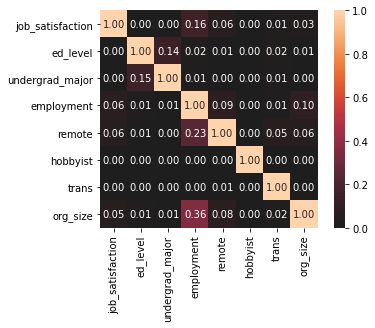

In [66]:
associations(df_2019_categorical, theil_u=True);

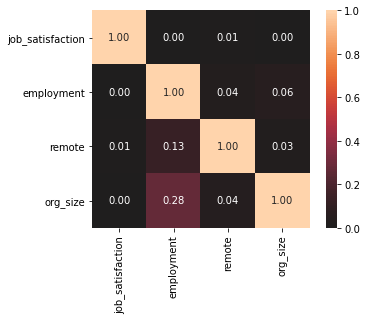

In [77]:
df_2019_higher_corr = df_2019_categorical.drop(['trans', 'hobbyist', 'undergrad_major', 'ed_level'], axis=1)
corr_results = associations(df_2019_higher_corr, theil_u=True);

In [63]:
corr_results['corr']

,job_satisfaction,employment,remote,org_size
job_satisfaction,1.000000,0.160288,0.056760,0.034645
employment,0.063224,1.000000,0.087072,0.100472
remote,0.060368,0.234783,1.000000,0.058389
org_size,0.048706,0.358107,0.077181,1.000000
